Name: Vardhana Sharma
Roll No.: SP22003

# Section C

In [105]:
#importing libraries
import matplotlib.pyplot as plt
from time import time
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
df1 = pd.read_csv('fashion-mnist_train.csv')
df2 = pd.read_csv('fashion-mnist_test.csv')

In [106]:
df = pd.concat([df1, df2], axis=0)

In [108]:
df.shape

(70000, 785)

In [119]:
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
51883,6,0,0,0,0,0,0,0,0,0,...,34,12,0,0,0,0,0,0,0,0
32224,2,0,0,0,0,0,2,0,0,0,...,0,0,0,0,165,213,21,0,0,0
47989,3,0,0,0,0,0,0,0,0,0,...,0,5,0,0,0,0,0,0,0,0
48377,3,0,0,0,0,0,0,0,0,0,...,150,85,21,0,0,0,0,0,0,0
40189,6,0,0,0,0,0,0,0,0,0,...,73,0,0,0,22,20,37,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1,0,0,0,0,0,0,0,0,0,...,145,143,125,31,0,0,0,0,0,0
41311,2,0,0,0,0,0,1,0,0,0,...,164,162,194,57,0,0,0,0,0,0
57637,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8059,1,0,0,0,0,0,0,0,0,0,...,52,0,0,0,0,0,0,0,0,0


1.  MLP, train an MLP classifier on FashionMNIST dataset (divide training set into 85:15 train to validation set). The hidden layers should be of sizes (256, 32). Choose appropriate number of epochs and batch size.

In [109]:
df = df.sample(n=12000)
df.shape

(12000, 785)

In [110]:
df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,12000.000000,12000.0,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,...,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,4.551083,0.0,0.008083,0.042333,0.110167,0.281167,0.472833,0.877333,2.271083,5.881417,...,34.063833,22.793917,16.061000,17.644167,23.130083,18.103583,8.315417,2.644833,0.849500,0.085417
std,2.857313,0.0,0.429185,2.023993,3.136960,5.207562,6.898241,9.218055,14.881422,24.549292,...,57.034658,48.292050,41.274299,43.754075,52.324573,45.360401,29.109275,17.051806,9.292042,2.569566
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,57.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,0.0,45.000000,218.000000,185.000000,227.000000,226.000000,247.000000,225.000000,250.000000,...,254.000000,255.000000,253.000000,251.000000,255.000000,255.000000,250.000000,251.000000,205.000000,170.000000


In [111]:
dfarr = np.array(df)

In [112]:
from sklearn.model_selection import train_test_split  
X = dfarr[:,1:]/255
Y = dfarr[:,0]

In [113]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size= 0.15) 

1.Plot training loss v/s epochs and validation loss v/s epochs for activations simgoid, ReLU, tanh and linear (default learning rate). Which is the best
activation function? Give analysis and comparison for each.

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


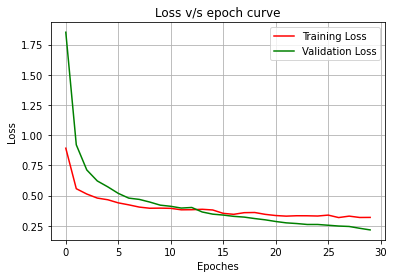

In [114]:
#Linear Activation Function
mlp1 = MLPClassifier(hidden_layer_sizes=(256, 32),activation='identity',max_iter=30)
fit1=mlp1.fit(X_train, Y_train)
los1 = fit1.loss_curve_
fit2=mlp1.fit(X_test, Y_test)
los2 = fit2.loss_curve_
plt.title("Loss v/s epoch curve")
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.plot(los1, color='red', label='Training Loss')
plt.plot(los2, color='green', label='Validation Loss')
plt.grid(True)
plt.legend()
plt.show()

Insights:
    
In Linear Activation Function The Training loss is maximum in the beginning 
but decreasing gradually with the increase in number of epoches.
Training loss and valiation loss are overlaping in between.

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


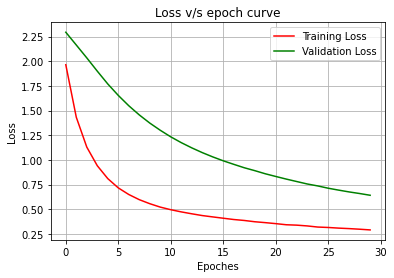

In [115]:
#Sigmoid Activation Function
mlp11 = MLPClassifier(hidden_layer_sizes=(256, 32),activation='logistic',max_iter=30)
fit11=mlp11.fit(X_train, Y_train)
los11 = fit11.loss_curve_
fit22=mlp11.fit(X_test, Y_test)
los22 = fit22.loss_curve_
plt.title("Loss v/s epoch curve")
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.plot(los11, color='red', label='Training Loss')
plt.plot(los22, color='green', label='Validation Loss')
plt.grid(True)
plt.legend()
plt.show()

Insights:
    
In Sigmoid Activation Function The Training loss is maximum in the beginning 
but decreasing gradually with the increase in number of epoches.
Difference between Training loss and valiation loss is more.

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


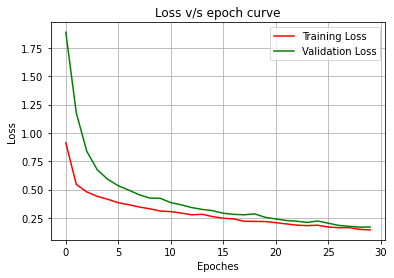

In [116]:
#ReLu Activation Function
mlp111 = MLPClassifier(hidden_layer_sizes=(256, 32),activation='relu',max_iter=30)
fit111=mlp111.fit(X_train, Y_train)
los111 = fit111.loss_curve_
fit222=mlp111.fit(X_test, Y_test)
los222 = fit222.loss_curve_
plt.title("Loss v/s epoch curve")
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.plot(los111, color='red', label='Training Loss')
plt.plot(los222, color='green', label='Validation Loss')
plt.grid(True)
plt.legend()
plt.show()

Insights:
    
In ReLu Activation Function The Training and validation loss is maximum in the beginning 
but decreasing gradually with the increase in number of epoches.
Training loss and valiation loss are overlaping in between and the difference between
then is very less.

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


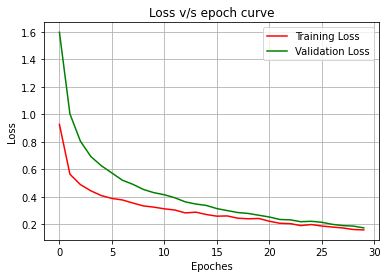

In [117]:
#Tanh Activation Function
mlp1111 = MLPClassifier(hidden_layer_sizes=(256, 32),activation='tanh',max_iter=30)
fit1111=mlp1111.fit(X_train, Y_train)
los1111 = fit1111.loss_curve_
fit2222=mlp1111.fit(X_test, Y_test)
los2222 = fit2222.loss_curve_
plt.title("Loss v/s epoch curve")
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.plot(los1111, color='red', label='Training Loss')
plt.plot(los2222, color='green', label='Validation Loss')
plt.grid(True)
plt.legend()
plt.show()

Insights:
    
In tanh Activation Function The Training and validation loss is maximum in the beginning 
but decreasing gradually with the increase in number of epoches.
Training loss and valiation loss are overlaping in between and the difference between
then is less.

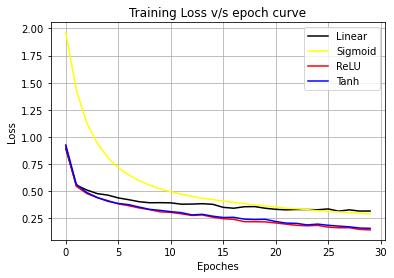

In [118]:
plt.title("Training Loss v/s epoch curve")
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.plot(los1, color='black', label='Linear')
plt.plot(los11, color='yellow', label='Sigmoid')
plt.plot(los111, color='red', label='ReLU')
plt.plot(los1111, color='blue', label='Tanh')
plt.grid(True)
plt.legend()
plt.show()

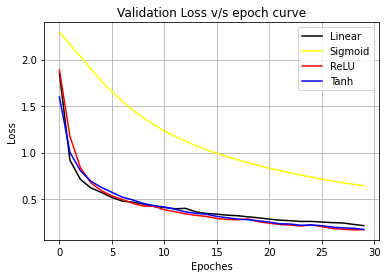

In [120]:
plt.title("Validation Loss v/s epoch curve")
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.plot(los2, color='black', label='Linear')
plt.plot(los22, color='yellow', label='Sigmoid')
plt.plot(los222, color='red', label='ReLU')
plt.plot(los2222, color='blue', label='Tanh')
plt.grid(True)
plt.legend()
plt.show()

Conclusion:

From the above plots we can see that the training and validation loss are decreasing gradually
with the number of epoches in the case of ReLu activation function. Training and validation Losses
are minimum in the case of ReLu as compared to other activation function therefore we can say that Relu is the best activation function for 
the case of given dataset.  

2.Using the best activation function obtained above, train models using
learning rates [0.1, 0.01, 0.001]. Plot training loss v/s epochs and validation loss v/s
epochs. Which is the best learning rate? Give explanations of the results obtained
for each learning rate.

In [127]:
c = 0
s = pd.DataFrame(columns = ['rate','epochs','train_accuracy','test_accuracy','time_taken'])
for rate in [0.1, 0.01, 0.001]:
    for epoch in [10,20,30]:
        t = time()
        mlp = MLPClassifier(learning_rate_init=rate, max_iter=epoch)
        mlp.fit(X_train, Y_train)
        e = time() - t
        acc_train = accuracy_score(Y_train, mlp.predict(X_train)) 
        acc_test = accuracy_score(Y_test, mlp.predict(X_test)) 
        s.loc[c] = [rate,epoch,acc_train,acc_test,e]
        c=c+1

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_per

In [128]:
s

,rate,epochs,train_accuracy,test_accuracy,time_taken
0,0.100,10.0,0.635490,0.616111,3.223574
1,0.100,20.0,0.585294,0.595000,5.892589
2,0.100,30.0,0.758627,0.723333,9.847516
3,0.010,10.0,0.881961,0.835000,3.308213
4,0.010,20.0,0.930392,0.851111,6.508223
5,0.010,30.0,0.943235,0.862222,10.193228
6,0.001,10.0,0.879118,0.866667,3.718145
7,0.001,20.0,0.902059,0.865000,7.552707
8,0.001,30.0,0.924706,0.863333,11.708856


Conclusion: 
    
So from the above analysis and comparision we can conclude that
the best test accuracy and train accuracy is given by the the learning rate = 0.001
and the epoches = 30 
Model do not overfit.

Plotting the loss curve by taking these best values 
with activation fuction function ReLu

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


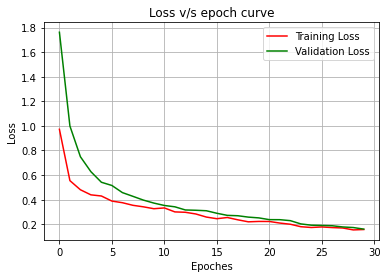

In [137]:
mlp1111 = MLPClassifier(hidden_layer_sizes=(256, 32),activation='relu',max_iter=30,learning_rate_init=0.001)
fit1111=mlp1111.fit(X_train, Y_train)
los1111 = fit1111.loss_curve_
fit2222=mlp1111.fit(X_test, Y_test)
los2222 = fit2222.loss_curve_
plt.title("Loss v/s epoch curve")
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.plot(los1111, color='red', label='Training Loss')
plt.plot(los2222, color='green', label='Validation Loss')
plt.grid(True)
plt.legend()
plt.show()

learning rate change the model in response to the estimated error.
validation loss and traing losses are decreasing.

3.Decrease the number of neurons in each layer to various values. What
do you observe? Plot training loss v/s epochs. Justify your answer.


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


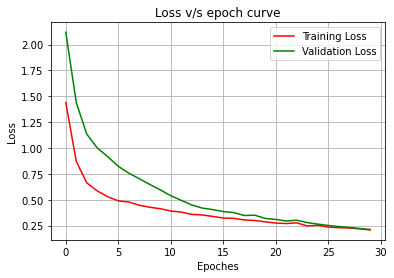

In [135]:
mlp1111 = MLPClassifier(hidden_layer_sizes=(256, 10),activation='relu',max_iter=30,learning_rate_init=0.001)
fit1111=mlp1111.fit(X_train, Y_train)
los1111 = fit1111.loss_curve_
fit2222=mlp1111.fit(X_test, Y_test)
los2222 = fit2222.loss_curve_
plt.title("Loss v/s epoch curve")
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.plot(los1111, color='red', label='Training Loss')
plt.plot(los2222, color='green', label='Validation Loss')
plt.grid(True)
plt.legend()
plt.show()

Conclusion:

As we decreased the number of neutrons then it would become more dense
and the loss will be less. The results will be more accurate.

5. Perform grid search on appropriate parameters of MLPClassifier. Choose the best parameters. Give an analysis of why you might have got those parameters.


In [52]:
from sklearn.model_selection import GridSearchCV
mlp = MLPClassifier(max_iter=30)
parameter_space = {'hidden_layer_sizes': [(256,32),(20,)],'activation': ['tanh', 'relu', 'logistic'],'solver': ['sgd', 'adam','lbfgs'],'alpha': [0.0001, 0.01, 0.001],'learning_rate': ['constant','adaptive', 'invscaling'],}
model = GridSearchCV(mlp_, parameter_space, n_jobs=-1, cv=3)
model.fit(X_train, Y_train) 

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=30), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu', 'logistic'],
                         'alpha': [0.0001, 0.01, 0.001],
                         'hidden_layer_sizes': [(256, 32), (20,)],
                         'learning_rate': ['constant', 'adaptive',
                                           'invscaling'],
                         'solver': ['sgd', 'adam', 'lbfgs']})

In [54]:
print('Best parameters are:', model.best_params_)

Best parameters are: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (256, 32), 'learning_rate': 'invscaling', 'solver': 'adam'}


Training and validation Losses are minimum in the case of ReLu therefor we can say that Relu is the best activation function for 
the case of given dataset.  